In [3]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com


In [4]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [15]:
cursor = remote.cursor(buffered=True)

cursor.execute("""
                SELECT 
    CASE 
        WHEN ca.career IN ('경력무관', '초대졸이상') THEN '경력무관'
        WHEN ca.career = '신입' THEN '신입'
        WHEN ca.career IN ('경력1년이상', '경력2년이상', '경력3년이상') THEN '1-3년'
        WHEN ca.career IN ('경력4년이상', '경력5년이상', '경력6년이상') THEN '4-6년'
        WHEN ca.career IN ('경력7년이상', '경력8년이상', '경력9년이상', '경력10년이상') THEN '7년이상'
        ELSE '기타'
    END AS career_group,
    COUNT(*) AS count
FROM 
    company_info co
JOIN 
    recruit_info re ON co.comp_id = re.comp_name_id
JOIN 
    career_info ca ON ca.career_id = re.career_id
WHERE 
    ca.career != '정보없음' 
    AND NOT ca.career LIKE '%초대졸%'
GROUP BY 
    career_group
ORDER BY 
    count DESC;


""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,1-3년,82
1,경력무관,43
2,신입,38
3,4-6년,33
4,7년이상,6
5,기타,1


In [39]:
remote.close()

In [13]:
df.columns = ["경력", "수"]

In [14]:
# 기업규모 정렬 순서 설정
order = ["경력무관", "신입", "1-3년", "4-6년", "7년이상"]
df["경력"] = pd.Categorical(df["경력"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["경력"]).reset_index(drop=True)

# 결과 출력
df


,경력,수
0,경력무관,43
1,신입,38
2,1-3년,82
3,4-6년,33
4,7년이상,6
5,NaN,1


In [16]:
df.drop(index=5, inplace=True)

In [17]:
df

,0,1
0,1-3년,82
1,경력무관,43
2,신입,38
3,4-6년,33
4,7년이상,6


In [19]:
df.columns = ["경력", "수"]

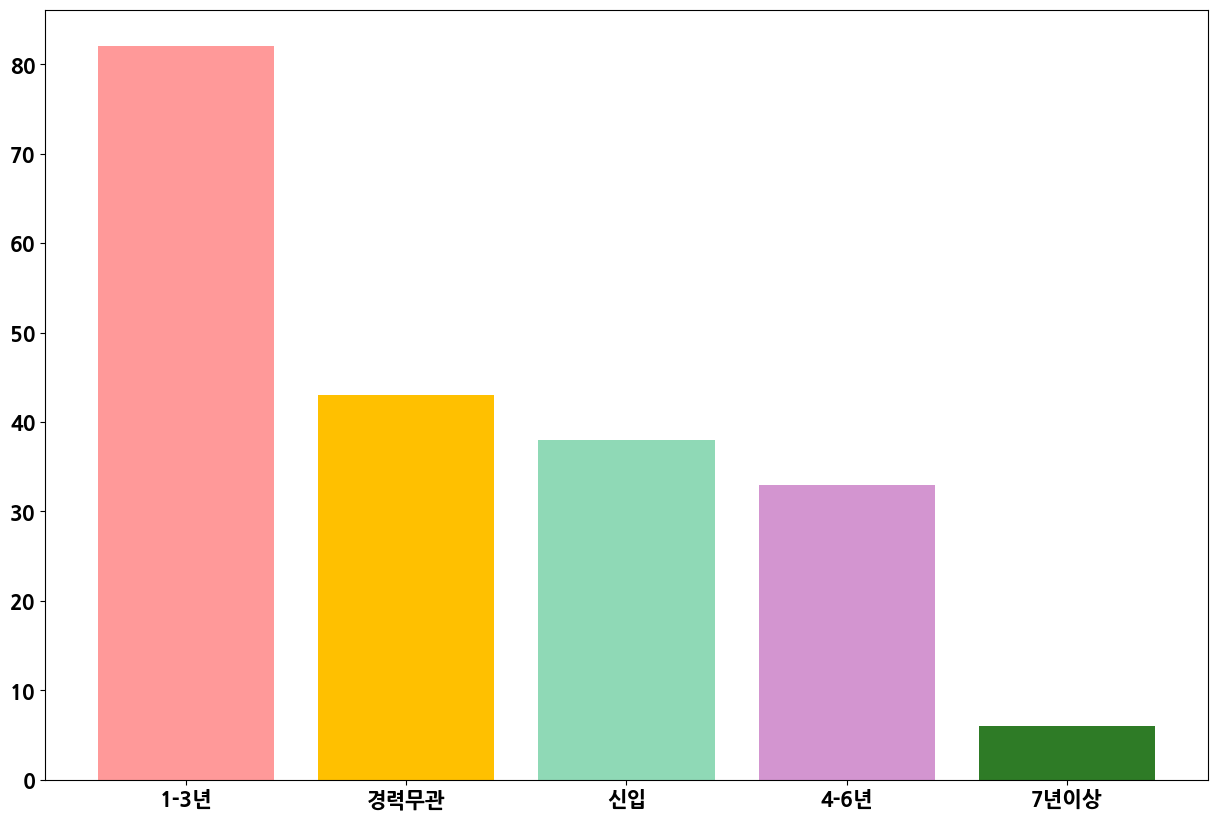

In [25]:
import matplotlib.pyplot as plt

# 색상 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(df)]

# 막대 그래프 생성
plt.figure(figsize=(15, 10))
plt.bar(df["경력"], df["수"], color=colors[:len(df)])

# 글씨 크기와 볼드체 적용
plt.xlabel("", fontsize=14, fontweight='bold')
plt.ylabel("", fontsize=14, fontweight='bold')
# plt.title("경력별 데이터 분포", fontsize=16, fontweight='bold')

# x축 라벨 크기 설정
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# 그래프 출력
plt.show()


<Axes: xlabel='경력', ylabel='num'>

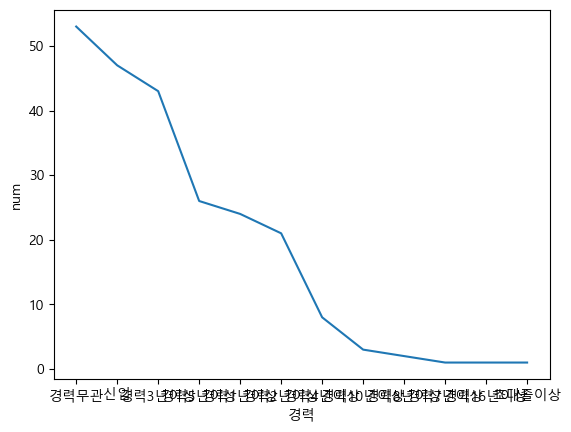

In [28]:
sns.lineplot(x=df["경력"], y=df["num"], data=df)

<Axes: xlabel='경력', ylabel='num'>

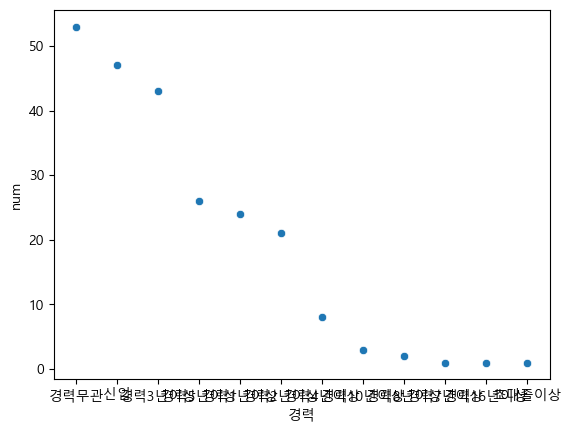

In [32]:
sns.scatterplot(x=df["경력"], y=df["num"], data=df)

In [51]:
remote.close()